In [1]:
###################################
# F-0 common functions
###################################

def get_minimal_subsets(sets):
    sets = sorted(map(set, sets), key=len)
    minimal_subsets = []
    for s in sets:
        if not any(minimal_subset.issubset(s) for minimal_subset in minimal_subsets):
            minimal_subsets.append(s)
    return minimal_subsets

def num_noisol(n):
    # Store all graphs without isolated vertices to a list:
    no_isol = [g for g in graphs(n) if min([g.degree(v) for v in g]) >=1]
    return len(no_isol)

# Zero forcing and variants software used for standard and PSD zero forcing
# developed by S. Butler, L. DeLoss, J. Grout, H.T. Hall, J. LaGrange, J.C.-H. Lin,T. McKay, J. Smith, G. Tims
# updated and maintained by Jephian C.-H. Lin 
load("https://raw.githubusercontent.com/jephianlin/minrank_aux/master/load_all.py")
load_all(mr_JG=True, minrank_aux=False, timeout=5, load_func="loadurl")

/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.SSLContext() without protocol argument is deprecated.
  content = urlopen(req, timeout=1, context=SSLContext())
/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  content = urlopen(req, timeout=1, context=SSLContext())
Compiling /home/jupyter-hogben@iastate.edu-c55cc/.sage/temp/sagemath2/134959/tmp_5fc43fy8.pyx...


xrange test failed: define xrange = range
Loading Zq_c.pyx...
Loading Zq.py...
Loading zero_forcing_64.pyx...


Compiling /home/jupyter-hogben@iastate.edu-c55cc/.sage/temp/sagemath2/134959/tmp_bbu9cb65.pyx...
Compiling /home/jupyter-hogben@iastate.edu-c55cc/.sage/temp/sagemath2/134959/tmp_wrebmepw.pyx...


Loading zero_forcing_wavefront.pyx...
Loading minrank.py...
Loading inertia.py...


In [8]:
####################################
# This Sage worksheet is written by Bryan Curtis and Leslie Hogben hogben@aimath.org 
# adapting code written by numerous people.
# The focus of this worksheet is token addition and removal (TAR) reconfiguration graphs
# for skew zero forcing in support of the paper
# Survey of TAR reconfiguration graphs for X-set parameters
# by
# Bryan Curtis, Mary Flagg, and Leslie Hogben
# 
# It is organized by parameters, labeled with the sections of the paper.
# To run computations in a section, 
# you must first enter the next cell F-0 and then the function F- cells at the beginning of the section
# (entering all cells from the beginning through end in order will also work).
# 
# This code has inefficienies. Its focus is on getting accurate results, not optimizing code.
###################################

In [ ]:
###################################
# Section 3.1 Domination
###################################

In [2]:
# F-Domination Functions for domination TAR graphs
# enter this cell in order to run computations in this section 
#
# Test for domination (G is a graph, S subsret V(G)):
# G.is_dominating(S) where S=[v1,...,vk]

# Return a minimum dominating set (G is a graph, S subsret V(G)):
# G.dominating() 

# input: a graph G
# output: the power domination number of G
def Dom(G):
    ds=G.dominating_set()
    return len(ds)

# All dominating sets of G of size k
# input: a graph G and a positive integer k 
# output: a list of all dominating sets of G of size k
def Dsets(G,k):
    ord=G.order()
    V = G.vertices()
    AllSubs = set(Subsets(V,k))
    Ds=[]
    for s in AllSubs:
        if G.is_dominating(s):
            Ds.append(s)
    return Ds

# All dominating sets of G of size <= k
# input: a graph G and a positive integer k 
# output: a list of all dominating sets of G of size <= k
def D_up_to_size_k(G,k):
    S=[]
    for i in [0..k]:
        D_size_i=Dsets(G,i)
        S=S+D_size_i
    return S

# Outputs all minimal zero forcing sets
def D_min_sets(G):
    ord = G.order()
    Ds = D_up_to_size_k(G,ord)
    mD = get_minimal_subsets(Ds)
    return mD

# Upper domination number function
# input: a graph G
# Output: the domination number and upper domination number
def Dbar(G):
    min_list = D_min_sets(G)
    Dbar = max(len(x) for x in min_list)
    Dm = min(len(x) for x in min_list)
    return Dm, Dbar

# Domination reconfiguration graph 
# adapted from code by Chassidy Bozeman     
# input: A graph G and a positive integer k 
# output: The domination TAR reconfiguration graph on power dominating set up to size k. 
       
def TARdom_reconfig(G,k):     
    S=D_up_to_size_k(G,k)     # creates a list of all zf sets up to size k.   
    H=Graph()    # creates empty graph           
    H.add_vertices(S)     # add dom sets up to size k to the vertices of H       
    # The following part determines if the size of two skew forcing sets differ            
    # by one and if one is a subset of the other. If both are true, an edge is added.   
    for i in range(len(S)):
        for j in range(i+1, len(S)):
            if len(S[i])-len(S[j]) in {-1,1}: 
                    if set(S[i]).issubset(set(S[j])): 
                        H.add_edge(S[i],S[j])  
                    else:
                        if set(S[j]).issubset(set(S[i])):
                            H.add_edge(S[i],S[j])            
    return H

# The following code finds the number of graphs (with no isol vtxs) with unique domination reconfiguration graphs
# Input: Integer n (graph order)
# Output: number of nonisomorphic graphs of order n with unique domination TAR reconfiguration graph.
def uni_dom(n):
    # Store all graphs without isolated vertices to a list:
    no_isol = [g for g in graphs(n) if min([g.degree(v) for v in g]) >=1]
    # Create a list of lists - each sublist contains all graphs with the same reconfiguration graph
    # The first element of each sublist is a copy of the reconfiguration graph (directly corresponding to the second element)
    unique = []
    for g in no_isol:
        flag = False
        tar_g = TARdom_reconfig(g,n)
        for h in unique:
            if tar_g.is_isomorphic(h[0]):
                h.append(g)
                flag = True
                break
        if not flag:
            unique.append([tar_g,g])
    # Keep only graphs with unique reconfiguration graph:
    unique = [p for p in unique if len(p) == 2]
    return len(unique)

In [ ]:
# The next two cells construct the data in Table 3.1

In [26]:
for i in [2..7]:
    uq=uni_dom(i)
    noiso=num_noisol(i)
    print(i,uq,noiso,n(uq/noiso))

2 1 1 1.00000000000000
3 2 2 1.00000000000000
4 5 7 0.714285714285714
5 14 23 0.608695652173913
6 55 122 0.450819672131148
7 348 888 0.391891891891892


In [3]:
uq=uni_dom(8)
noiso=num_noisol(8)
print(uq,noiso,n(uq/noiso)) 

4275 11302 0.378251636878429


In [ ]:
###################################
# Section 3.2 Power domination
###################################

In [4]:
###################################
# F-Power: Power domination TAR Functions
# enter this cell in order to run computations in this section 

# Test for power dominating set adapted from code by Brian Wissman
# input: a graph G and a subset of its vertices V
# output: true/false depending if V is a power dominating set of G
def isPowerDominatingSet(G,V):  
    N=[]
    for i in V:
        N+=G.neighbors(i)
    NVert=sorted(set(N+list(V)))   
    A=zerosgame(G,NVert)
    if len(A)==G.order():
        return True
    else:
        return False

# Power dominating sets 

# All power dominating sets of G of size k
# input: a graph G and a positive integer k 
# output: a list of all power dominating sets of G of size k
def PDsets(G,k):
    ord=G.order()
    V = G.vertices()
    AllSubs = set(Subsets(V,k))
    PD=[]
    for s in AllSubs:
        if isPowerDominatingSet(G,s):
            PD.append(s)
    return PD

# All power dominating sets of G of size <= k
# input: a graph G and a positive integer k 
# output: a list of all power dominating sets of G of size <= k
def PD_up_to_size_k(G,k):
    S=[]
    for i in [0..k]:
        PD_size_i=PDsets(G,i)
        S=S+PD_size_i
    return S
    
# Minimal power dominating sets of G
# input: a graph G 
# output: a list of all minimal power dominating sets of G \
def PD_min_sets(G):
    ord = G.order()
    PD = PD_up_to_size_k(G,ord)
    mPD = get_minimal_subsets(PD)
    return mPSDS

# Power domination number and upper power domination number of G
# input: a graph G 
# output: the upper minimal zero forcing number
def PSDbar(G):
    min_list = PD_min_sets(G)
    PDbar = max(len(x) for x in min_list)
    PD = min(len(x) for x in min_list)
    return PD, PDbar

# Power domination TAR reconfiguration graph
# adapted from code by Chassidy Bozeman        
# input: A graph G and a positive integer k 
# output: The power domination TAR reconfiguration graph on power dominating sets up to size k. 
       
def TARpower_reconfig(G,k):    
    S=PD_up_to_size_k(G,k)     # creates a list of all zf sets up to size k.    
    H=Graph()    # creates empty graph           
    H.add_vertices(S)     # add zf sets up to size k to the vertices of H       
    # The following part determines if the size of two skew forcing sets differ            
    # by one and if one is a subset of the other. If both are true, an edge is added.    
    for i in range(len(S)):
        for j in range(i+1, len(S)):
            if len(S[i])-len(S[j]) in {-1,1}: 
                    if set(S[i]).issubset(set(S[j])): 
                        H.add_edge(S[i],S[j])  
                    else:
                        if set(S[j]).issubset(set(S[i])):
                            H.add_edge(S[i],S[j])            
    return H

# The following code finds the number of graphs (with no isol vtxs) with unique power domination reconfiguration graphs
# Input: Integer n (graph order)
# Output: number of nonisomorphic graphs of order n with unique power domination TAR reconfiguration graph.
def uni_pd(n):
    # Store all graphs without isolated vertices to a list:
    no_isol = [g for g in graphs(n) if min([g.degree(v) for v in g]) >=1]
    # Create a list of lists - each sublist contains all graphs with the same reconfiguration graph
    # The first element of each sublist is a copy of the reconfiguration graph (directly corresponding to the second element)
    unique = []
    for g in no_isol:
        flag = False
        tar_g = TARpower_reconfig(g,n)
        for h in unique:
            if tar_g.is_isomorphic(h[0]):
                h.append(g)
                flag = True
                break
        if not flag:
            unique.append([tar_g,g])
    # Keep only graphs with unique reconfiguration graph:
    unique = [p for p in unique if len(p) == 2]
    return len(unique)


In [ ]:
# The next two cells construct the data in Table 3.2

In [40]:
for i in [2..7]:
    uq=uni_pd(i)
    noiso=num_noisol(i)
    print(i,uq,noiso,n(uq/noiso))

2 1 1 1.00000000000000
3 0 2 0.000000000000000
4 3 7 0.428571428571429
5 4 23 0.173913043478261
6 13 122 0.106557377049180
7 25 888 0.0281531531531532


In [5]:
uq=uni_pd(8)
noiso=num_noisol(8)
print(uq,noiso,n(uq/noiso)) 

79 11302 0.00698991328968324


In [ ]:
###################################
# Section 4 PSD forcing TAR
###################################

In [8]:
###################################
# F-PSD: PSD TAR Functions
# enter this cell in order to run computations in this section 

# Load PSD propagation time functions, including pt_plus(G,S), which returns < 0 if not PSD forcing set
# code by Nathan Warnberg
# updated and maintained by Jephian C.-H. Lin 
# Warning: Using this may not be efficient
load('https://raw.githubusercontent.com/jephianlin/zero_forcing/master/psd_prop_time_interval.py')

# PSD forcing sets 
#
# All PSD forcing sets of G of size k
# input: a graph G and a positive integer k 
# output: a list of all PSD forcing sets of G of size k
def PSDsets(G,k):
    ord=G.order()
    V = G.vertices()
    AllSubs = set(Subsets(V,k))
    PSDFS=[]
    for s in AllSubs:
        if pt_plus(G,s)>=0:
            PSDFS.append(s)
    return PSDFS

# All PSD forcing sets of G of size <= k
# input: a graph G and a positive integer k 
# output: a list of all PSD forcing sets of G of size <= k
def PSD_up_to_size_k(G,k):
    S=[]
    for i in [0..k]:
        PSD_size_i=PSDsets(G,i)
        S=S+PSD_size_i
    return S
    
# All minimal PSD forcing sets
# input: a graph G 
# output: a list of all minimal PSD forcing sets of G 
def PSD_min_sets(G):
    ord = G.order()
    PSDS = PSD_up_to_size_k(G,ord)
    mPSDS = get_minimal_subsets(PSDS)
    return mPSDS

# PSD forcing number and upper PSD forcing number 
#
# input: a graph G 
# output: the PSD forcing number and the upper minimal PSD forcing number
def PSDbar(G):
    min_list = PSD_min_sets(G)
    Zpbar = max(len(x) for x in min_list)
    Zp = min(len(x) for x in min_list)
    return Zp, Zpbar

# TAR Reconfiguration graph functions
# adapted from code by Chassidy Bozeman    
    
# input: A graph G and a positive integer k 
# output: The PSD TAR reconfiguration graph on power dominating set up to size k. 
       
def TARpsd_reconfig(G,k):     
    S=PSD_up_to_size_k(G,k)     # creates a list of all zf sets up to size k.    
    H=Graph()    # creates empty graph           
    H.add_vertices(S)     # add zf sets up to size k to the vertices of H       
    # The following part determines if the size of two skew forcing sets differ            
    # by one and if one is a subset of the other. If both are true, an edge is added.    
    for i in range(len(S)):
        for j in range(i+1, len(S)):
            if len(S[i])-len(S[j]) in {-1,1}: 
                    if set(S[i]).issubset(set(S[j])): 
                        H.add_edge(S[i],S[j])  
                    else:
                        if set(S[j]).issubset(set(S[i])):
                            H.add_edge(S[i],S[j])            
    return H

# The following code finds/tests graphs (with no isol vtxs) with unique PSD reconfiguration graphs
#
# Find number of graphs (with no isol vtxs) with unique PSD reconfiguration graphs
# Input: Integer n (graph order)
# Output: number of nonisomorphic graphs of order n with unique PSD TAR reconfiguration graphs.
def unipsd(n):
    # Store all graphs without isolated vertices to a list:
    no_isol = [g for g in graphs(n) if min([g.degree(v) for v in g]) >=1]
    # Create a list of lists - each sublist contains all graphs with the same reconfiguration graph
    # The first element of each sublist is a copy of the reconfiguration graph (directly corresponding to the second element)
    unique = []
    for g in no_isol:
        flag = False
        tar_g = TARpsd_reconfig(g,n)
        for h in unique:
            if tar_g.is_isomorphic(h[0]):
                h.append(g)
                flag = True
                break
        if not flag:
            unique.append([tar_g,g])
    # Keep only graphs with unique reconfiguration graph:
    unique = [p for p in unique if len(p) == 2]
    return len(unique)

# Test one graph h for unique PSD TAR graph
# Input: Graph h being tested
# Output: number of nonisomorphic graphs of order n with unique PSD TAR reconfiguration graphs.
def is_unipsd(h):
    nn=h.order()
    # Store all graphs without isolated vertices to a list:
    no_isol = [g for g in graphs(nn) if min([g.degree(v) for v in g]) >=1]
    # Create a list of lists - each sublist contains all graphs with the same reconfiguration graph
    # The first element of each sublist is a copy of the reconfiguration graph (directly corresponding to the second element)
    flag = True
    tar_h=TARpsd_reconfig(h,nn)
    for g in no_isol:
        if not g.is_isomorphic(h):
            tar_g = TARpsd_reconfig(g,nn)
            if tar_g.is_isomorphic(tar_h):
                flag = False
                show(g)
                print(g.graph6_string())
                break
    if flag:
        print('unique')
    return flag

/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.SSLContext() without protocol argument is deprecated.
  content = urlopen(req, timeout=1, context=SSLContext())
/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  content = urlopen(req, timeout=1, context=SSLContext())


xrange test passed
Loading Zq_c.pyx...


Compiling /home/jupyter-hogben@iastate.edu-c55cc/.sage/temp/sagemath2/134959/tmp_rd_7dd9a.pyx...
/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.SSLContext() without protocol argument is deprecated.
  content = urlopen(req, timeout=1, context=SSLContext())
/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  content = urlopen(req, timeout=1, context=SSLContext())


Loading Zq.py...
Loading zero_forcing_64.pyx...


Compiling /home/jupyter-hogben@iastate.edu-c55cc/.sage/temp/sagemath2/134959/tmp_gi0uicrd.pyx...
/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.SSLContext() without protocol argument is deprecated.
  content = urlopen(req, timeout=1, context=SSLContext())
/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  content = urlopen(req, timeout=1, context=SSLContext())
Compiling /home/jupyter-hogben@iastate.edu-c55cc/.sage/temp/sagemath2/134959/tmp_4m37y45l.pyx...


Loading zero_forcing_wavefront.pyx...


/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.SSLContext() without protocol argument is deprecated.
  content = urlopen(req, timeout=1, context=SSLContext())
/usr/lib/python3/dist-packages/sage/misc/remote_file.py:46: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  content = urlopen(req, timeout=1, context=SSLContext())


Loading minrank.py...
Loading inertia.py...


In [ ]:
# Proposition 4.6: Cases q=2, 3

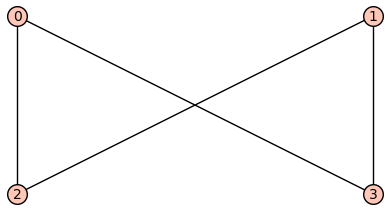

unique


True

In [6]:
k22=graphs.CompleteBipartiteGraph(2,2)
show(k22)
is_unipsd(k22)

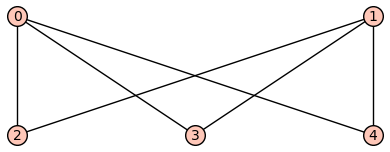

unique


True

In [5]:
k23=graphs.CompleteBipartiteGraph(2,3)
show(k23)
is_unipsd(k23)

In [ ]:
# The next two cells construct Table 4.1

In [3]:
for i in [2..7]:
    uq=unipsd(i)
    noiso=num_noisol(i)
    print(i,uq,noiso,n(uq/noiso))

2 1 1 1.00000000000000
3 2 2 1.00000000000000
4 3 7 0.428571428571429
5 10 23 0.434782608695652
6 48 122 0.393442622950820
7 398 888 0.448198198198198


In [9]:
uq=unipsd(8)
noiso=num_noisol(8)
print(uq,noiso,n(uq/noiso))

6798 11302 0.601486462572996


In [ ]:
###################################
# Section 5 Skew forcing TAR
###################################

In [6]:
###################################
# F-Skew: Skew TAR Functions
# enter this cell in order to run computations in this section 

# Function for determing if a set is a skew forcing set
# adapted from code written by Steve Butler
# Inputs graph G and set S
# Outout True if S is skew forcing set for G and False otherwise
def is_skew(G,S):
    """
    Determine whether S is a skew forcing set of G (all vertices unlooped).
    """
    V=set(G.vertices())
    done = False
    active = set(S)
    filled = set(S)
    for v in V:
        N=set(G.neighbors(v))
        if v in active and N.issubset(filled):
            active.remove(v)
        if (v not in active) and (len(N.intersection(filled)) == G.degree(v)-1):
            active.add(v)   
    while not done:
        done = True
        new_active = copy(active)
        new_filled = copy(filled)

        for v in active:
            N=set(G.neighbors(v))
            if len(N.intersection(filled)) == G.degree(v)-1:
                if done:
                    done = False
                N.symmetric_difference_update(N.intersection(filled))
                u=N.pop()
                new_active.remove(v)
                new_active.add(u)
                new_filled.add(u)

        active = copy(new_active)
        filled = copy(new_filled)
        for v in V:
            N=set(G.neighbors(v))
            if v in active and N.issubset(filled):
                active.remove(v)
            if (v not in active) and (len(N.intersection(filled)) == G.degree(v)-1):
                active.add(v)
    if len(filled)==len(V):
        return True
    return False


# All skew forcing sets of G of size k
# input: a graph G and a positive integer k 
# output: a list of all zero forcing sets G of size k
def ZsFsets(G,k):
    ord=G.order()
    V = G.vertices()
    AllSubs = set(Subsets(V,k))
    ZsFS=[]
    for s in AllSubs:
        if is_skew(G,s):
            ZsFS.append(s)
    return ZsFS

# All skew forcing sets of G of size <= k
# input: a graph G and a positive integer k 
# output: a list of all zero forcing sets G of size <= k
def ZsFS_up_to_size_k(G,k):
    S=[]
    for i in [0..k]:
        ZFS_size_i=ZsFsets(G,i)
        S=S+ZFS_size_i
    return S
    
# Minimal skew forcing sets
# Input: a graph G
# Output: all minimal zero forcing sets of G
def ZsF_min_sets(G):
    ord = G.order()
    ZsFS = ZsFS_up_to_size_k(G,ord)
    mZsFS = get_minimal_subsets(ZsFS)
    return mZsFS

# Skew forincg numbers
# Input: a graph G
# Output: the skew forcing number and upper skew forcing number (minimal and maximal sizes of minimal skew foricng sets)
def zsbar(G):
    min_list = ZsF_min_sets(G)
    zsb = max(len(x) for x in min_list)
    zs = min(len(x) for x in min_list)
    return zs, zsb

# Reconfiguration graph functions
# adapted from code by Chassidy Bozeman      
# input: A graph G and a positive integer k 
# output: The TAR skew reconfiguration graph on sets up to size k. 
       
def TARskew_reconfig(G,k):     
    S=ZsFS_up_to_size_k(G,k) # creates a list of all zf sets up to size k.    
    H=Graph()     # creates empty graph    
    H.add_vertices(S) # add skew sets up to size k to the vertices of H       
    # The following part determines if the size of two skew forcing sets differ            
    # by one and if one is a subset of the other. If both are true, an edge is added.    
    for i in range(len(S)):
        for j in range(i+1, len(S)):
            if len(S[i])-len(S[j]) in {-1,1}: 
                    if set(S[i]).issubset(set(S[j])): 
                        H.add_edge(S[i],S[j])  
                    else:
                        if set(S[j]).issubset(set(S[i])):
                            H.add_edge(S[i],S[j])            
    return H

# The following code finds the number of graphs (with no isol vtxs) with unique skew reconfiguration graphs
# Input: Integer n (graph order)
# Output: number of nonisomorphic graphs of order n with unique skew TAR reconfiguration graph.
def uni_skew(n,disp):
    # Store all graphs without isolated vertices to a list:
    no_isol = [g for g in graphs(n) if min([g.degree(v) for v in g]) >=1]
    # Create a list of lists - each sublist contains all graphs with the same reconfiguration graph
    # The first element of each sublist is a copy of the reconfiguration graph (directly corresponding to the second element)
    unique = []
    for g in no_isol:
        flag = False
        tar_g = TARskew_reconfig(g,n)
        for h in unique:
            if tar_g.is_isomorphic(h[0]):
                h.append(g)
                flag = True
                break
        if not flag:
            unique.append([tar_g,g])
    # Keep only graphs with unique reconfiguration graph:
    unique = [p for p in unique if len(p) == 2]
    if disp:
        for g in unique:
            g[1].show()
            print(g[1].graph6_string())
    return len(unique)

# Functions for the Leaf-Stripping Algorithm

# Find list of leaves and neighbors
# input: graph g
# output: list of leaves and neighbors of leaves
def leafs(g):
    ord=g.order()
    k=0
    leafs=[]
    nhbrs=[]
    for k in g.degree_iterator(labels=True):
        if k[1]==1:
            leafs.append(k[0])
            nhbrs.append(g.neighbors(k[0])[0])
    strip=set(leafs).union(nhbrs)
    return leafs, nhbrs, strip

# Repeatedly strip all leaves and neighbors
# input: graph g
# output: if results is empty set, i.e., Z_-(g)=0, the return n umber of iterations to strip all leaves; 
# otherwise return -1 (meaning Z_-(g)>0)
def leafstripsimult(h):
    g=h.copy()
    show(g)  # comment out this line to avboid pictures
    hasleaf=True
    k=0                     # k is the iteration counter
    ord=g.order()
    ds=g.degree_sequence()  # degree sequence is nonincreasing
    if ds[ord-1]==0:        # isolated vertex
        return -1            
    while hasleaf:
        k=k+1               # another iteration is run  
        if ds[0]==1:        # successful completion but rK_2 contributes 1 not 2 to prop time
            print('Z_-=0')
            return True
        lf=leafs(g)         # lf is set of leaves
        x=set(lf[1])
        if len(lf[0])==0:   # no leaf
            return False
        if len(lf[0])!=len(x):    # too many leaves for 1 neighbor
            return False
        g.delete_vertices(lf[2])  # delete leaves and nhbrs
        ord=g.order()
        if ord==0:          # successful completion
            print('Z_-=0')
            return True
        ds=g.degree_sequence()
        if ds[ord-1]==0:    # isolated vertex
            return False
        show(g)  # comment out this line to avboid pictures

In [ ]:
###################################
# Section 5.1 Uniqueness of skew TAR graphs

In [ ]:
# Illustration of the Leaf-stripping Algorithm

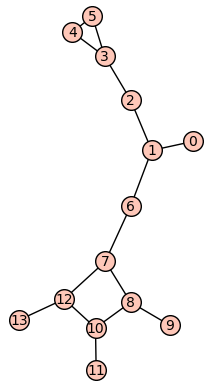

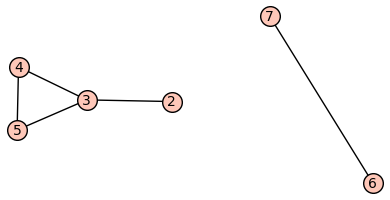

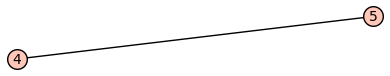

Z_-=0


True

In [41]:
g=Graph({1:[0,2,6],3:[2,4,5],4:[5],7:[6,8,12],10:[8,12,11],12:[13],9:[8]})
leafstripsimult(g)

In [ ]:
# The next two cells construct the data in Table 5.1

In [15]:
for i in [2..7]:
    uq=uni_skew(i,False)
    noiso=num_noisol(i)
    print(i,uq,noiso,n(uq/noiso))

2 1 1 1.00000000000000
3 2 2 1.00000000000000
4 4 7 0.571428571428571
5 7 23 0.304347826086957
6 27 122 0.221311475409836
7 179 888 0.201576576576577


In [7]:
uq=uni_skew(8,False)
noiso=num_noisol(8)
print(uq,noiso,n(uq/noiso))

3026 11302 0.267740222969386


In [ ]:
# Unique skew TAR graps that are not multiparitite
#
# For n=2,3,4 we have only complete multiparitite graphs with unique skew TAR graphs (by counting)

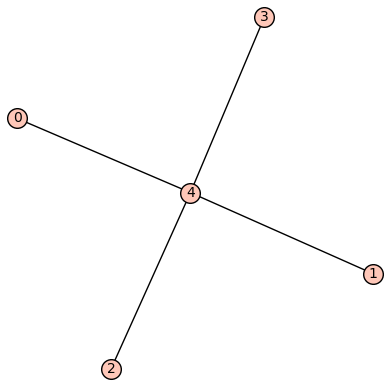

D?{


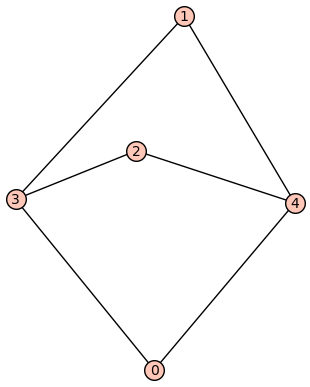

DFw


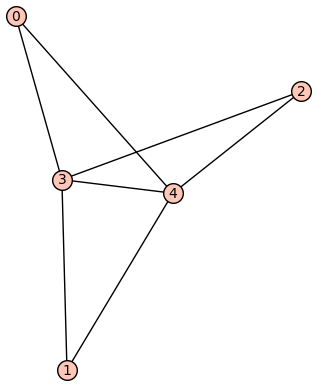

DF{


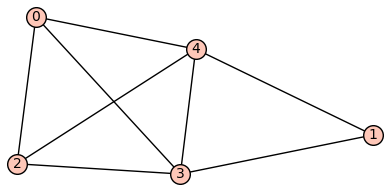

DV{


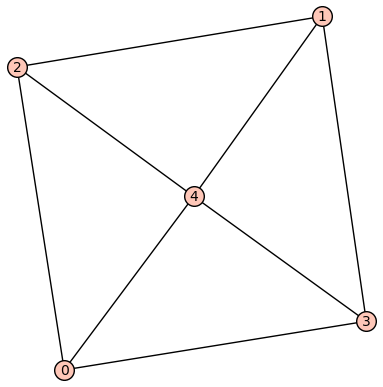

D]{


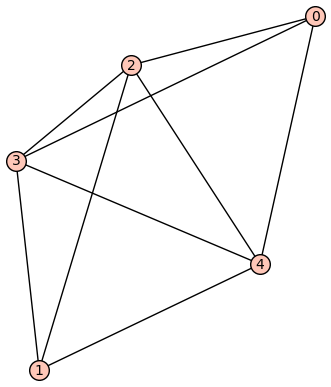

D^{


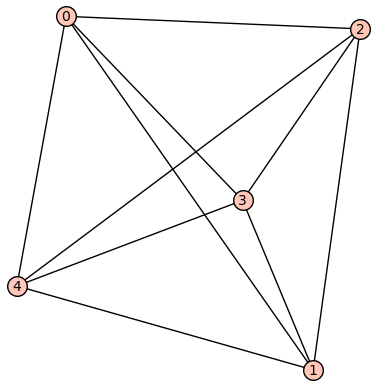

D~{


7

In [42]:
# Display all base graphs with unique skew TAR graphs for n=5
uni_skew(5,True)

In [ ]:
# First two are K_{1,4} and K_{2,3}.  Check the rest:

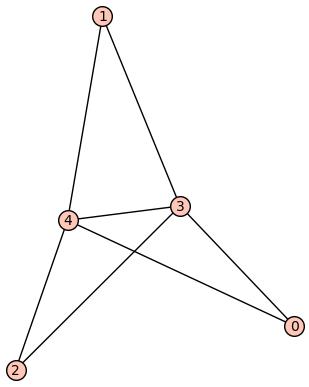

True

In [21]:
G=Graph("DF{")
show(G)
H=graphs.CompleteMultipartiteGraph([1,1,3])
G.is_isomorphic(H)

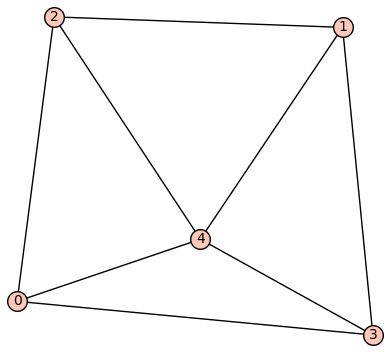

True

In [22]:
G=Graph("D]{")
show(G)
H=graphs.CompleteMultipartiteGraph([1,2,2])
G.is_isomorphic(H)

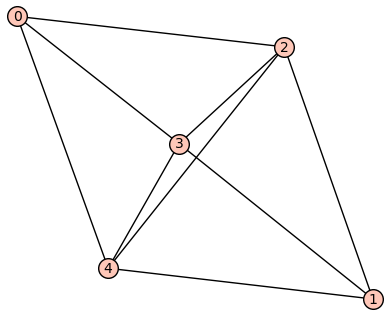

True

In [23]:
G=Graph("D^{")
show(G)
H=graphs.CompleteMultipartiteGraph([1,1,1,2])
G.is_isomorphic(H)

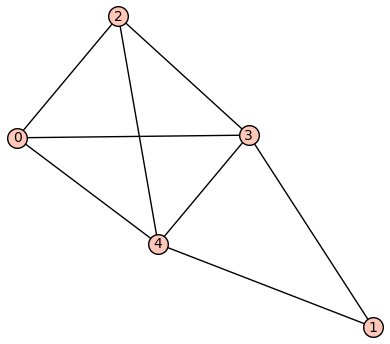

In [24]:
# The first base graph that is not multipartite and has a unique skew TAR graph 
FH=Graph("DV{")
show(FH)

In [ ]:
###################################
# Section 5.2 Connectedness of skew TAR graphs
# The material in this section is not cited in the paper 
# but illustrates results for several grapoh families

In [ ]:
# The computations below illustrate Proposition 5.7 for H(3) (but are not necessary)

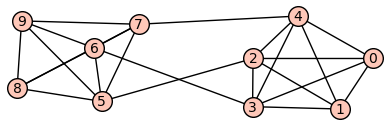

(3, 4)

In [10]:
h1=graphs.CompleteGraph(5)
h2=graphs.CompleteGraph(5)
h2.relabel([5,6,7,8,9])
h1.relabel([0,1,2,3,4])
h=h1.union(h2)
h.add_edges([(2,5),(3,6),(4,7)])
show(h)
zsbar(h)

In [22]:
ZsF_min_sets(h)

[{0, 2, 4},
 {5, 7, 9},
 {2, 3, 4},
 {6, 7, 8},
 {0, 2, 3},
 {5, 6, 9},
 {0, 3, 4},
 {5, 6, 7},
 {5, 7, 8},
 {1, 3, 4},
 {6, 7, 9},
 {5, 6, 8},
 {1, 2, 3},
 {1, 2, 4},
 {0, 1, 3, 5},
 {4, 6, 8, 9},
 {3, 5, 8, 9},
 {0, 1, 4, 5},
 {2, 6, 8, 9},
 {0, 1, 2, 7},
 {0, 1, 4, 6},
 {2, 7, 8, 9},
 {0, 1, 3, 7},
 {4, 5, 8, 9},
 {0, 1, 2, 6},
 {3, 7, 8, 9}]

In [20]:
tarh5=TARskew_reconfig(h,5)
tarh5.is_connected()

False

In [ ]:
# The computations below illustrate Proposition 5.9 (but are not necessary)

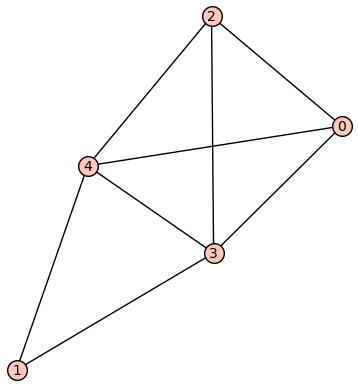

In [43]:
FH=Graph("DV{")
show(FH)

In [44]:
ZsF_min_sets(FH)

[{3}, {4}, {0, 1, 2}]

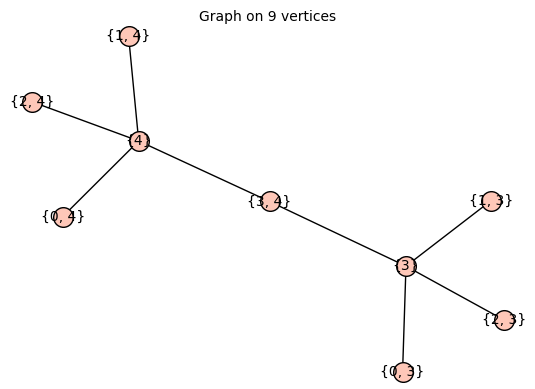

In [45]:
TARskew_reconfig(FH,2)

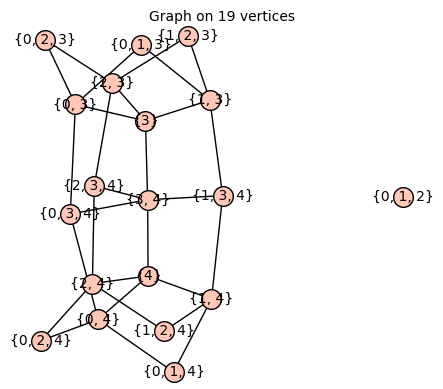

In [11]:
TARskew_reconfig(FH,3)

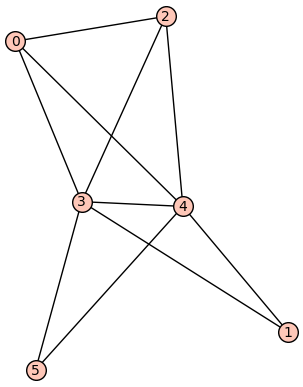

In [12]:
FH.add_vertex(5)
FH.add_edges([[5,4],[5,3]])
show(FH)

In [13]:
ZsF_min_sets(FH)

[{1, 4}, {4, 5}, {3, 5}, {1, 3}, {0, 1, 2, 5}]

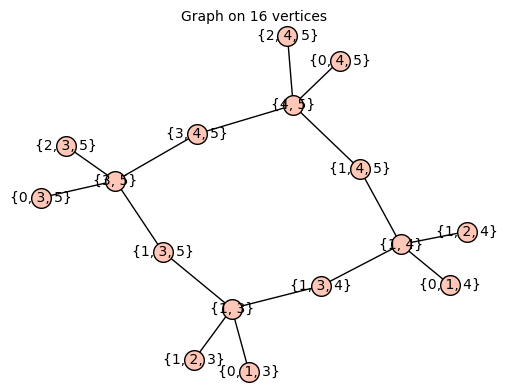

In [13]:
TARskew_reconfig(FH,3)

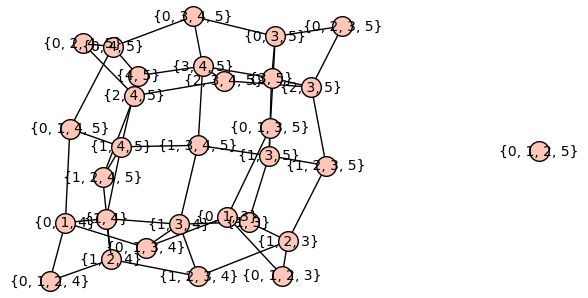

In [15]:
TAR_reconfig(FH,4).plot()

In [ ]:
###################################
# Section 5.3 Skew irrelevant vertices
# The material in this section is not cited in the paper 
# but illustrates results for several grapoh families

In [ ]:
# The computations below illustrate Example 5.14 (but are not necessary)
# Irrelevant vertex not forced by the empty set

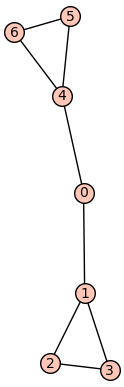

[{2}, {3}, {1}, {6}, {5}, {4}]

In [3]:
f2=Graph({1:[0,2,3],2:[3],4:[0,5,6],5:[6]})
show(f2)
ZsF_min_sets(f2)

In [23]:
ZsF_min_sets(f2)

[{2}, {3}, {1}, {6}, {5}, {4}]

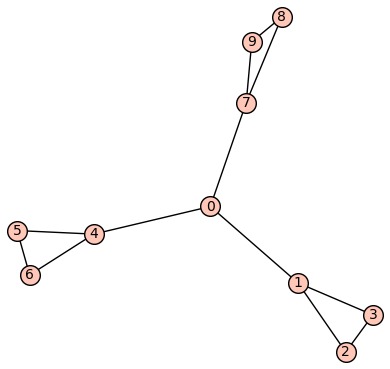

In [11]:
f3=Graph({1:[0,2,3],2:[3],4:[0,5,6],5:[6],7:[0,8,9],8:[9]})
show(f3)

In [25]:
ZsF_min_sets(f3)

[{2, 8},
 {1, 4},
 {3, 9},
 {2, 6},
 {4, 9},
 {2, 9},
 {5, 9},
 {3, 4},
 {6, 9},
 {1, 7},
 {2, 4},
 {1, 8},
 {3, 5},
 {1, 6},
 {5, 8},
 {4, 7},
 {3, 7},
 {3, 6},
 {6, 7},
 {3, 8},
 {1, 5},
 {6, 8},
 {2, 7},
 {5, 7},
 {1, 9},
 {2, 5},
 {4, 8}]

In [ ]:
###################################
# Section 6 Vertex Cover TAR
###################################

In [ ]:
# No computatiuons are cited in this section but we present illustrative examples here

In [29]:
###################################
# F-VC: Vertex Cover TAR Functions
# enter this cell in order to run computations in this section 

# Determine whether S is a vertex cover of G.
# Input: Graph G and set S that is being tested as a vertex cover of G
# Output: True if S is a vertex cover of G, False otherwise
def is_vc(G,S):
    ED=G.edges()
    ned=G.num_edges()
    k=0
    fail = False
    for k in [0..ned-1]:
         if not ((ED[k][0] in S) or (ED[k][1] in S)):
            return fail
    return not fail

# vertex covers 

# All vertex covers of G of size k
# input: a graph G and a positive integer k 
# output: a list of all vertex covers of G of size k
def VCsets(G,k):
    V = G.vertices()
    AllSubs = set(Subsets(V,k))
    VCs=[]
    for s in AllSubs:
        if is_vc(G,s):
            VCs.append(s)
    return VCs

# All vertex covers of G of size <= k
# input: a graph G and a positive integer k 
# output: a list of all vertex covers of G of size <= k
def VC_up_to_size_k(G,k):
    S=[]
    for i in [0..k]:
        VC_size_i=VCsets(G,i)
        S=S+VC_size_i
    return S
    
# All minimal vertex covers
# input: a graph G 
# output: a list of all minimal vertex covers of G 
def VC_min_sets(G):
    ord = G.order()
    VCs = VC_up_to_size_k(G,ord)
    mVCs = get_minimal_subsets(VCs)
    return mVCs

# Vertex cover number and upper vertex cover number

# input: a graph G 
# output: vertex cover number and upper vertex cover number of G 
def vcbar(G):
    min_list = VC_min_sets(G)
    vcb = max(len(x) for x in min_list)
    vc = min(len(x) for x in min_list)
    return vc, vcb

# Reconfiguration graph functions
# adapted from code by Chassidy Bozeman    
    
# input: A graph G and a positive integer k 
# output: The TAR skew reconfiguration graph on power dominating set up to size k.       
def TARvc_reconfig(G,k):     
    S=VC_up_to_size_k(G,k)     # creates a list of all zf sets up to size k.    
    H=Graph()    # creates empty graph           
    H.add_vertices(S)     # add zf sets up to size k to the vertices of H       
    # The following part determines if the size of two skew forcing sets differ            
    # by one and if one is a subset of the other. If both are true, an edge is added.    
    for i in range(len(S)):
        for j in range(i+1, len(S)):
            if len(S[i])-len(S[j]) in {-1,1}: 
                    if set(S[i]).issubset(set(S[j])): 
                        H.add_edge(S[i],S[j])  
                    else:
                        if set(S[j]).issubset(set(S[i])):
                            H.add_edge(S[i],S[j])            
    return H

In [ ]:
# Illustrate Examples 6.3 and 6.6 (complete biparite graphs K_p,q 2<=p<=q)
# upper VC number + 1 < least k0 such that k VC TAR graph is connected for all k >= k0
# VC TAR graph K_p,q is the vertex sum on V(K_p,q) of hypercubes of simension q and p
# (so V(K_p,q) is a cut-vertex)

In [28]:
k22=graphs.CompleteBipartiteGraph(2,2)
vcbar(k22)

(2, 2)

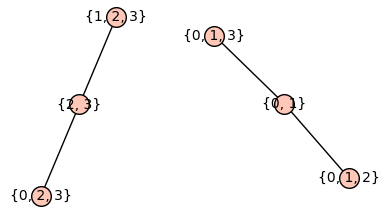

In [32]:
tarvc=TARvc_reconfig(k22,3)
show(tarvc)

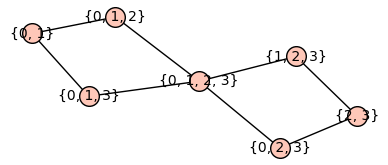

In [31]:
tarvc=TARvc_reconfig(k22,4)
show(tarvc)

In [35]:
k34=graphs.CompleteBipartiteGraph(3,4)
vcbar(k34)

(3, 4)

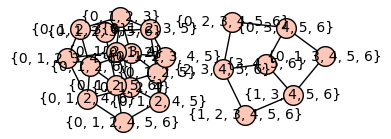

In [36]:
tarvc=TARvc_reconfig(k34,6)
show(tarvc)

In [37]:
tarvc.is_connected()

False